<a href="https://colab.research.google.com/github/KU-Gen-AI-2567/VAE-demo/blob/main/VAE_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VAE - 01418496

**สมาชิกกลุ่ม**

นายศิวกร ภาสว่าง 6410451423

นางสาว เเพรวรุ้ง พุดชะวา 6410451253

นางสาว มารีน่า มิทซุย 6410450222

หมู่ 200

ชุดข้อมูล : Anime Face Dataset

link download : https://www.kaggle.com/datasets/splcher/animefacedataset

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import kagglehub
import shutil
import os
import numpy as np
from PIL import Image
tf.__version__

'2.17.1'

## Setting to execute on Processor (GPU or CPU)

In [ ]:
gpus = tf.config.list_physical_devices("GPU")
if len(gpus) > 0:
    tf.config.experimental.set_memory_growth(gpus[0], True)
    print("Execute on GPU")
else:
    print("Execute on CPU")

Execute on CPU


## Download Dataset

In [ ]:
# Download the dataset folder in latest version
if not "dataset" in os.listdir("."):
    path = kagglehub.dataset_download("splcher/animefacedataset")
    print("Path to dataset files:", path)
    shutil.move(path, "./dataset")
    print("Download Dataset Complete")
else:
    print("Download Dataset Already")

Download Dataset Already


## Prepossessing

In [ ]:
from collections import Counter

# Check and count original image sizes
def check_image_sizes(directory):
    size_counter = Counter()
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                img = tf.keras.utils.load_img(img_path)
                size_counter[img.size] += 1
    for size, count in size_counter.items():
        print(f"Size: {size}, Count: {count}")

check_image_sizes("dataset/images")

Size: (100, 100), Count: 1394
Size: (95, 95), Count: 1530
Size: (55, 55), Count: 328
Size: (62, 62), Count: 636
Size: (90, 90), Count: 1516
Size: (97, 97), Count: 1406
Size: (101, 101), Count: 1285
Size: (109, 109), Count: 760
Size: (111, 111), Count: 590
Size: (124, 124), Count: 213
Size: (125, 125), Count: 190
Size: (94, 94), Count: 1534
Size: (96, 96), Count: 1556
Size: (93, 93), Count: 1434
Size: (77, 77), Count: 869
Size: (107, 107), Count: 825
Size: (89, 89), Count: 1360
Size: (70, 70), Count: 646
Size: (76, 76), Count: 942
Size: (113, 113), Count: 569
Size: (104, 104), Count: 1200
Size: (64, 64), Count: 626
Size: (58, 58), Count: 522
Size: (65, 65), Count: 593
Size: (87, 87), Count: 1264
Size: (82, 82), Count: 1085
Size: (53, 53), Count: 214
Size: (78, 78), Count: 853
Size: (59, 59), Count: 523
Size: (56, 56), Count: 412
Size: (84, 84), Count: 1245
Size: (60, 60), Count: 530
Size: (92, 92), Count: 1636
Size: (102, 102), Count: 1276
Size: (88, 88), Count: 1337
Size: (80, 80), Cou

In [ ]:
from tensorflow.keras import utils

IMAGE_SIZE = (64, 64) # 🤔
BATCH_SIZE = 128

train_data = utils.image_dataset_from_directory(
    "dataset/images",
    labels=None,
    color_mode="rgb", # 🤔
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    interpolation="bilinear",
)

def preprocess(img):
    img = tf.cast(img, "float32") / 255.0 # 🤔
    return img

train_data = train_data.map(lambda x: preprocess(x))

Found 63565 files.


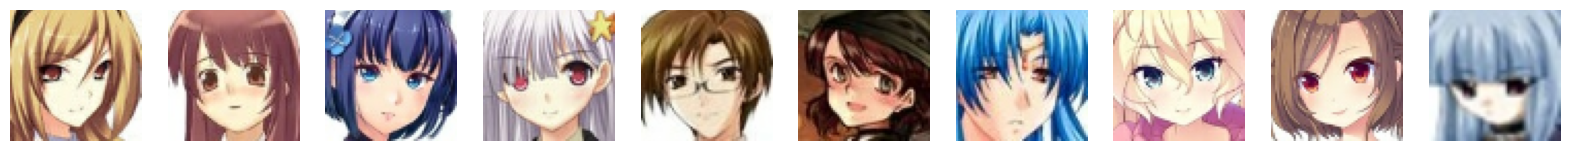

In [ ]:
import matplotlib.pyplot as plt

def sample_batch(dataset):
    batch = dataset.take(1).get_single_element()
    batch = batch[0] if isinstance(batch, tuple) else batch
    return batch.numpy()

def display(images, n=10, size=(20, 3), cmap="gray_r", as_type="float32"):
    if images.max() > 1.0:
        images = images / 255.0
    elif images.min() < 0.0:
        images = (images + 1.0) / 2.0

    plt.figure(figsize=size)

    for i in range(n):
        _ = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].astype(as_type), cmap=cmap)
        plt.axis("off")

    plt.show()

train_sample = sample_batch(train_data)
display(train_sample, cmap=None)

## Create Model

In [ ]:
# code for creating model
# ...

## Train Model

In [ ]:
# code for training model
# ...

## Visulization

In [ ]:
# code for visulization
# ...

## Member Participation

รายละเอียดการมีส่วนร่วม